In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [15]:
raw_per = pd.read_csv('Data/ALL/ALL_VOL_5YR_M.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('Data/ALL/ALL_SILH_SUIK_RT_MONTHLY_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

In [16]:
raw_per.head(7)

,Term,19900101,Current(20180928),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 5006,Unnamed: 5007,Unnamed: 5008,Unnamed: 5009,Unnamed: 5010,Unnamed: 5011,Unnamed: 5012,Unnamed: 5013,Unnamed: 5014,Unnamed: 5015
0,Symbol,A000010,A000011,A000012,A000020,A000021,A000022,A000023,A000030,A000031,...,A900310,A950010,A950030,A950070,A950100,A950110,A950130,A950140,A950160,A950170
1,Symbol Name,조흥은행,조흥은행(1신),조흥은행(2신),동화약품,동화약품공업(1신),동화약품(전환1신),동화약품(전환2신),우리은행,한빛은행(1신),...,컬러레이,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SBI핀테크솔루션즈,엑세스바이오,잉글우드랩,코오롱티슈진(Reg.S),JTC
2,Kind,BTA,BTA,BTA,BTA,BTA,BTA,BTA,BTA,BTA,...,BTA,BTA,BTA,BTA,BTA,BTA,BTA,BTA,BTA,BTA
3,Item,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,...,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009,S41B0M5009
4,Item Name,"변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)",...,"변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)","변동성 (M,5Yr)"
5,Frequency,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,...,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY
6,1990-01-31,0.431230,NaN,NaN,0.395080,NaN,NaN,NaN,0.392330,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 성과지표 데이터프레임 전처리 수행

In [17]:
per_df = Ko.Preprocessing(raw_per, column = '심볼')

# 수익률 DF 전처리

In [18]:
rt_df = Ko.Preprocessing(raw_rt, column = '심볼').apply(lambda x: Ko.rt_transform(x))

rt_df = rt_df.loc[per_df.index]
rt_df = rt_df.iloc[:, :-1]

In [19]:
rt_df.head()

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
A000010,0.9060,0.9407,0.9528,0.8512,1.1845,0.8607,1.0190,0.8458,0.9668,1.3143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,1.0695,0.9652,0.9279,0.8980,0.9734,0.8608,0.9161,1.0285,1.0138,1.0540,...,1.1652,0.9466,1.1077,1.0556,1.0746,0.9429,0.9913,0.8908,1.0833,1.0498
A000030,0.9000,0.9407,0.9528,0.8595,1.1827,0.8537,1.0190,0.8411,0.9778,1.3182,...,0.9878,0.9722,1.0698,0.9852,0.8825,1.0956,0.9533,1.0654,1.0368,0.9645
A000040,1.1000,0.9870,0.9474,0.8056,1.1552,0.7985,0.9533,0.8431,0.8488,1.3014,...,0.8586,0.9368,1.2924,0.8877,1.0285,1.1560,1.0825,0.8352,0.9701,1.0034
A000050,1.0000,1.0000,1.0000,0.9918,1.0146,1.0019,0.9918,1.0020,1.0023,0.9977,...,0.9381,1.0183,1.0432,0.9690,1.0000,1.0605,0.8758,1.0613,0.9206,1.0784


# 포트폴리오 구성 수행

In [20]:
data = Ko.portfolio_selection(per_df)

In [21]:
data.head(5)

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
A000010,x,5,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
A000020,x,4,4,4,4,4,4,4,4,4,...,1,1,1,1,1,1,1,1,1,1
A000030,x,4,4,4,4,4,4,4,5,5,...,2,2,2,1,1,1,1,1,1,1
A000040,x,8,8,8,8,8,8,8,8,8,...,4,4,4,5,5,5,5,5,5,5
A000050,x,4,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2


In [22]:
#data.to_csv('PER.csv')

# 포트폴리오 성과분석

In [23]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [24]:
result.min()

GROUP_0    0.748499
GROUP_1    0.700706
GROUP_2    0.698111
GROUP_3    0.691534
GROUP_4    0.661720
GROUP_5    0.670680
GROUP_6    0.645568
GROUP_7    0.639232
GROUP_8    0.648129
GROUP_9    0.459279
dtype: float64

In [25]:
result.max()

GROUP_0    1.873293
GROUP_1    1.515870
GROUP_2    1.529053
GROUP_3    1.518805
GROUP_4    1.465667
GROUP_5    1.616560
GROUP_6    1.706531
GROUP_7    1.762815
GROUP_8    1.792935
GROUP_9    2.048311
dtype: float64

# 1990년대

Text(0.5,1,'Performance result by PER Group')

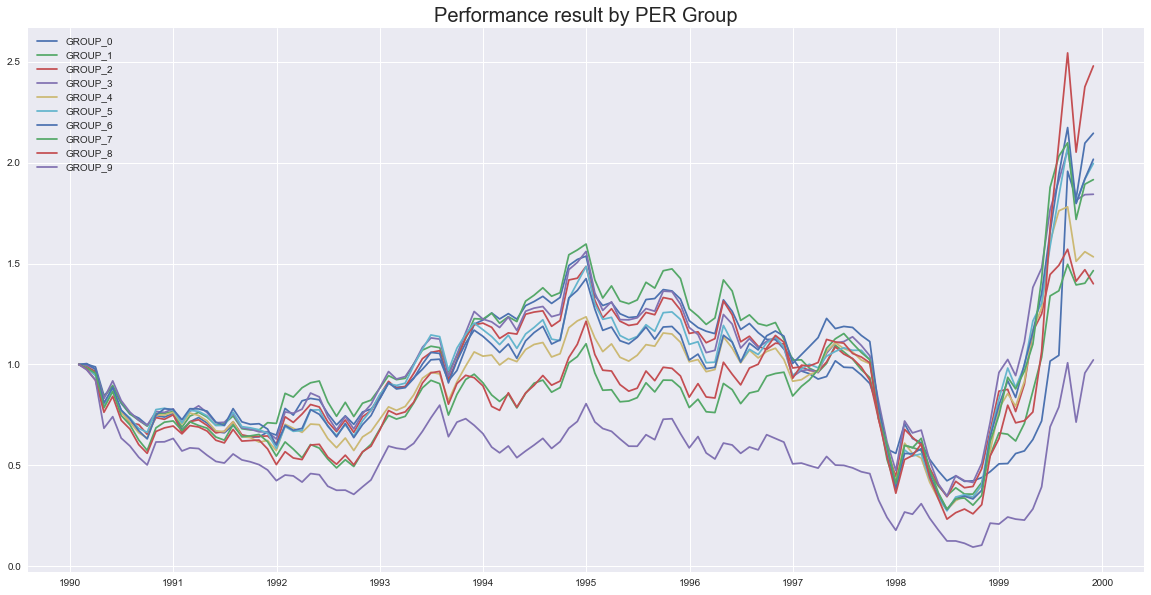

In [26]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[:119].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

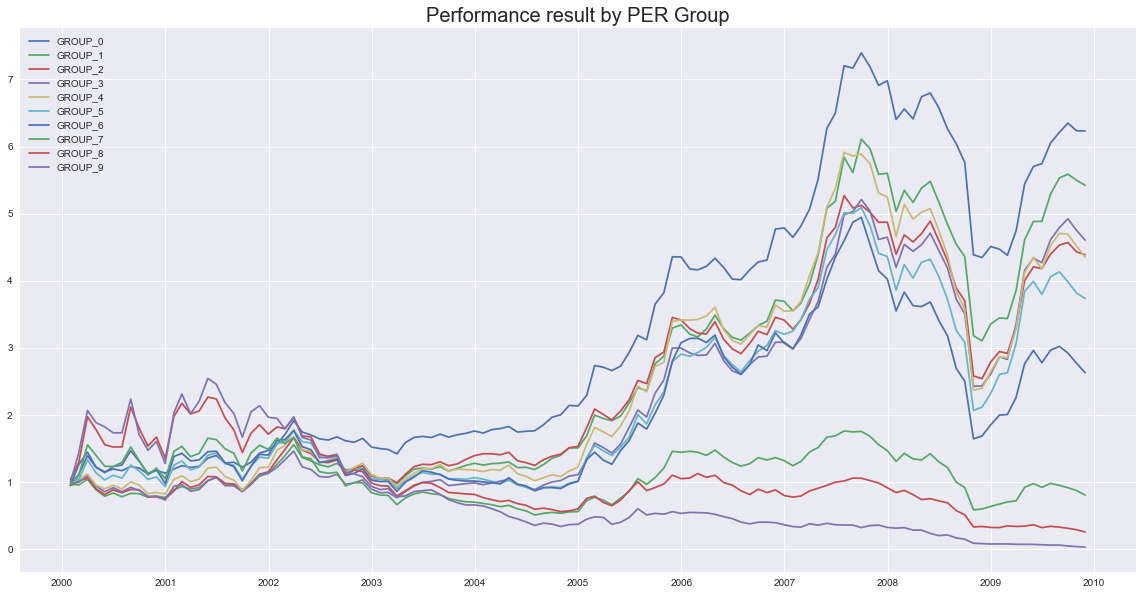

In [27]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[120:239].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

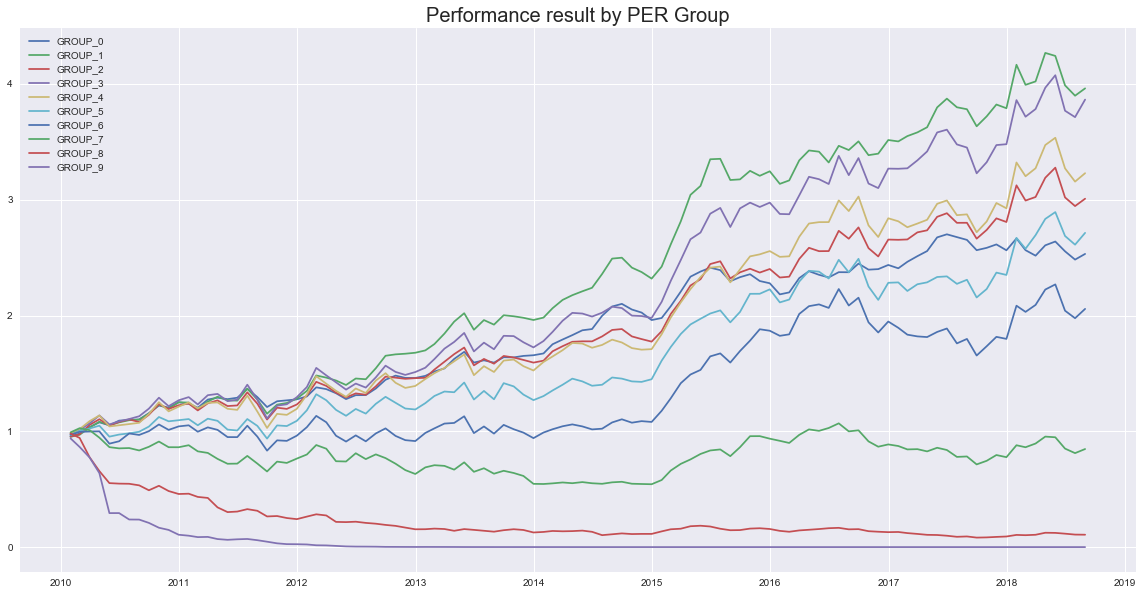

In [28]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[240:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

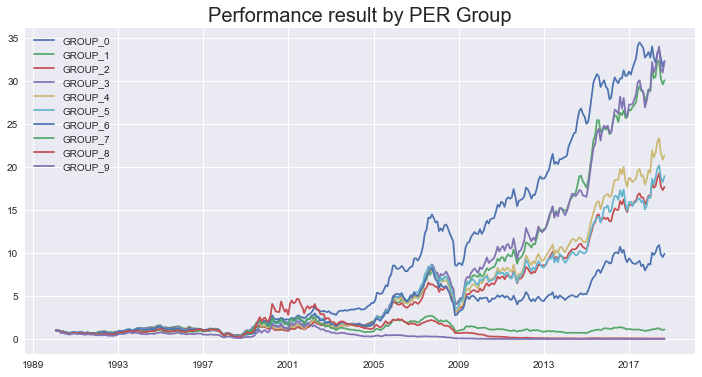

In [29]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Monthly return distribution by PER Group')

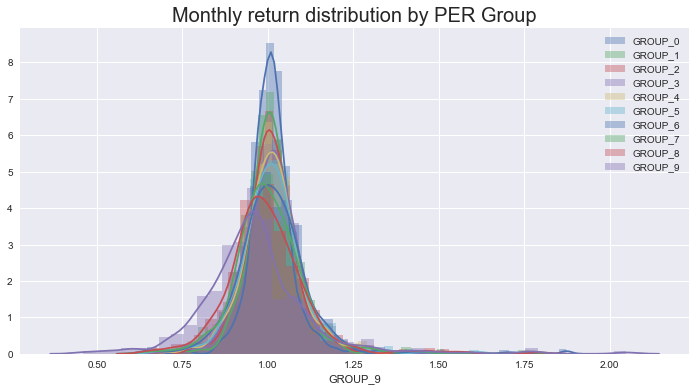

In [33]:
plt.figure(figsize = (12,6))

for column in result.columns:
    sns.distplot(result[column], label = column)

plt.legend(loc = 'best')
plt.title('Monthly return distribution by PER Group', fontsize = 20)

In [34]:
result.describe().apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
count,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000,344.000
mean,1.013,1.013,1.012,1.014,1.013,1.013,1.012,1.006,0.999,0.964
std,0.079,0.079,0.085,0.091,0.093,0.099,0.105,0.109,0.123,0.165
min,0.748,0.701,0.698,0.692,0.662,0.671,0.646,0.639,0.648,0.459
25%,0.976,0.973,0.966,0.964,0.964,0.961,0.955,0.943,0.932,0.886
50%,1.008,1.010,1.007,1.013,1.011,1.010,1.007,0.996,0.989,0.953
75%,1.039,1.053,1.052,1.058,1.055,1.058,1.064,1.055,1.053,1.017
max,1.873,1.516,1.529,1.519,1.466,1.617,1.707,1.763,1.793,2.048
